# Joint Constraints
In this notebook, after having computed $\chi_r^2$ surfaces for both the GW method ($z-d_L$ relation) and the long GRB data ($E_\text{peak}-E_\text{iso}$ relation). We will now sum both surfaces in other to obtains a combined constraint of the $\Omega_m, \Omega_\Lambda$ cosmological parameters.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

GW_CHI_SQUARE = np.load('GW/GW_chi_surface.npy')
GW_MASK = np.load('GW/GW_mask.npy')

gw_chi_surface = np.ma.array(GW_CHI_SQUARE, mask=GW_MASK)
gw_min = np.min(gw_chi_surface)


GRB_CHI_SQUARE = np.load('GW/SGRB_chi_surface.npy')
GRB_MASK = np.load('GW/SGRB_mask.npy')

grb_chi_surface = np.ma.array(GRB_CHI_SQUARE, mask=GRB_MASK)
grb_min = np.min(grb_chi_surface)

print(gw_chi_surface.shape, gw_min)
print(grb_chi_surface.shape, grb_min)

(100, 100) 0.016869684566436137
(100, 100) 295.8775421035448


Best_fit GW: Om=0.242	 Ode=0.848
Best_fit GRB: Om=0.000	 Ode=1.131


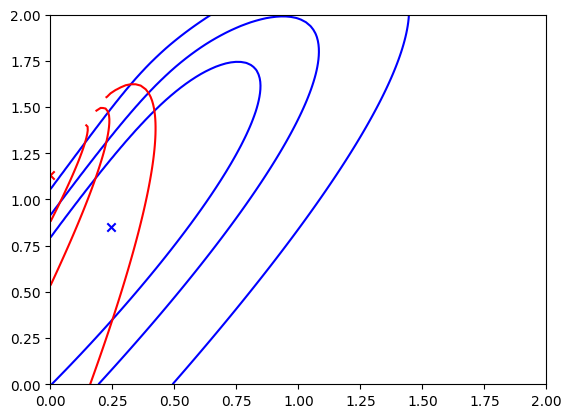

In [15]:
Om = np.linspace(0.0, 2.0, 100)
Ode = np.linspace(0.0, 2.0, 100)

i1, i2 = np.unravel_index(np.argmin(gw_chi_surface), gw_chi_surface.shape)
Om_gw, Ode_gw = Om[i1], Ode[i2]

i1, i2 = np.unravel_index(np.argmin(grb_chi_surface), grb_chi_surface.shape)
Om_grb, Ode_grb = Om[i1], Ode[i2]
print(f'Best_fit GW: Om={Om_gw:.3f}\t Ode={Ode_gw:.3f}')
print(f'Best_fit GRB: Om={Om_grb:.3f}\t Ode={Ode_grb:.3f}')

plt.figure()
plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='blue')
plt.contour(Om, Ode, grb_chi_surface.T, levels=[grb_min+2.3, grb_min+4.61, grb_min+9.21], colors='red')
plt.scatter(Om_gw, Ode_gw, c='b', label=f'GW: {Om_gw:.3f} {Ode_gw:.3f}', marker='x')
plt.scatter(Om_grb, Ode_grb, c='r', label=f'GRB: {Om_grb:.3f} {Ode_grb:.3f}', marker='x')

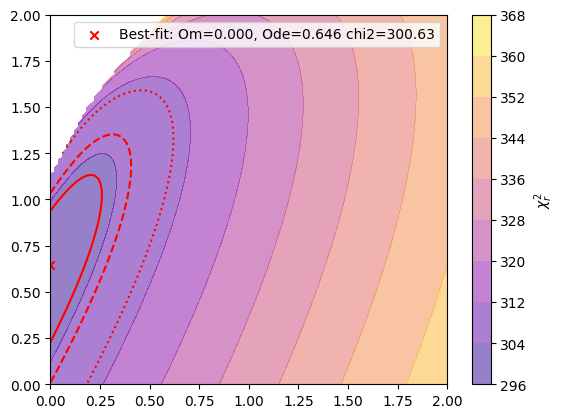

In [11]:
joint_surface = gw_chi_surface + grb_chi_surface
jmin = np.min(joint_surface)
i1, i2 = np.unravel_index(np.argmin(joint_surface), joint_surface.shape)
Omj, Odej = Om[i1], Ode[i2]

plt.figure()
im = plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.5)
plt.colorbar(im, label=r'$\chi_r^2$')
plt.contour(Om, Ode, joint_surface.T, levels=[jmin+2.3, jmin+4.61, jmin+9.21], colors='red', linestyles=['solid', 'dashed', 'dotted'])
plt.scatter(Omj, Odej, c='r', marker='x', label=f'Best-fit: Om={Omj:.3f}, Ode={Odej:.3f} chi2={jmin:.2f}')
plt.legend()

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_14198/1416996340.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='blue', linestyles=['solid', 'dashed', 'dotted'], label='GW')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_14198/1416996340.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Om, Ode, grb_chi_surface.T, levels=[grb_min+2.3, grb_min+4.61, grb_min+9.21], colors='red', linestyles=['solid', 'dashed', 'dotted'], label='GRB')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_14198/1416996340.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.8, label='GRB+GW')
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_14198/1416996340.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 640

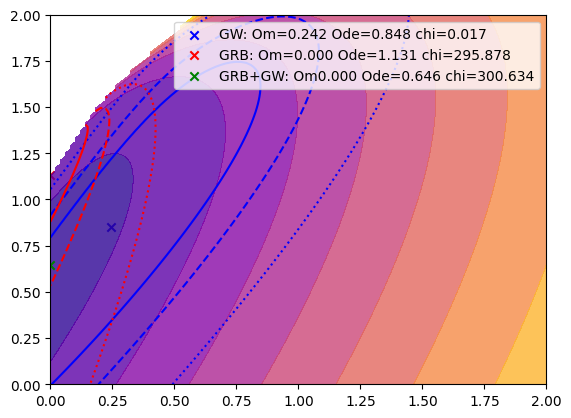

In [12]:
plt.figure()
plt.contour(Om, Ode, gw_chi_surface.T, levels=[gw_min+2.3, gw_min+4.61, gw_min+9.21], colors='blue', linestyles=['solid', 'dashed', 'dotted'], label='GW')
plt.contour(Om, Ode, grb_chi_surface.T, levels=[grb_min+2.3, grb_min+4.61, grb_min+9.21], colors='red', linestyles=['solid', 'dashed', 'dotted'], label='GRB')
plt.scatter(Om_gw, Ode_gw, c='b', label=f'GW: Om={Om_gw:.3f} Ode={Ode_gw:.3f} chi={gw_min:.3f}', marker='x')
plt.scatter(Om_grb, Ode_grb, c='red', label=f'GRB: Om={Om_grb:.3f} Ode={Ode_grb:.3f} chi={grb_min:.3f}', marker='x')

plt.contourf(Om, Ode, joint_surface.T, cmap='plasma', alpha=0.8, label='GRB+GW')
plt.colorbar(im, label=r'GRB-GW $\chi_r^2$')
plt.scatter(Omj, Odej, marker='x', color='green', label=f'GRB+GW: Om{Omj:.3f} Ode={Odej:.3f} chi={jmin:.3f}')

plt.legend()